In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [4]:
# Load Affair dataset
df = sm.datasets.fair.load_pandas().data

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [8]:
# Create new column called 'Had Affair 0-1'

def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [9]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [10]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [11]:
# Group by 'Had Affair column and call an aggregate function'

df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


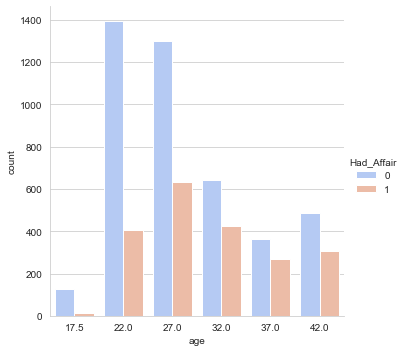

In [12]:
# Visualize using factor plots

sns.catplot(x='age', data= df, hue='Had_Affair', kind='count', palette= 'coolwarm')

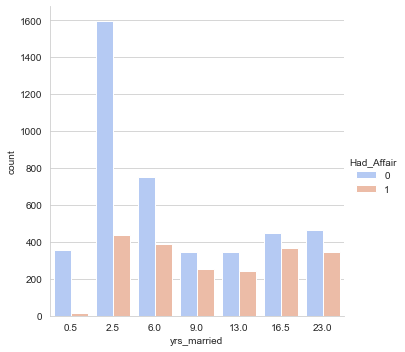

In [14]:
sns.catplot(x='yrs_married', data=df, hue='Had_Affair', kind='count', palette='coolwarm')

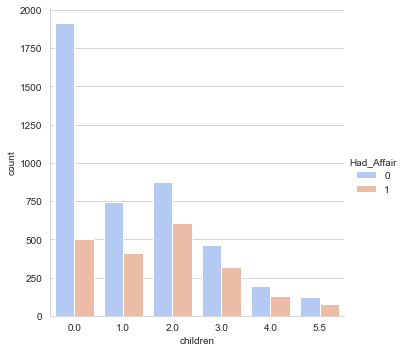

In [15]:
sns.catplot(x='children', data=df, hue='Had_Affair', kind='count', palette='coolwarm')

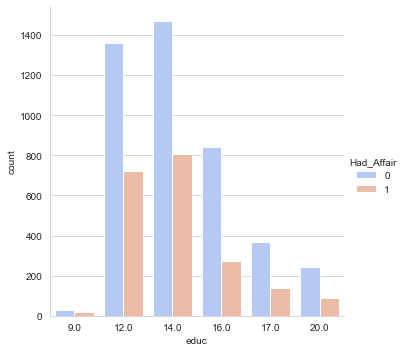

In [16]:
sns.catplot(x='educ', data=df, hue='Had_Affair', kind='count', palette='coolwarm')

## Data Preparation

In [17]:
# Create new DataFrames for the Categorical Variables, create dummy variable columns

occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [18]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [19]:
# Established 6 columns with a true/ false for occupation rather than a single column with categorical variables
# This limits confusion for the logistical regression

# Create column names for the new DataFrames

occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']


In [20]:
# Create X and Y datasets for logistical regression

X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [21]:
dummies = pd.concat([occ_dummies,hus_occ_dummies], axis=1)

In [22]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [23]:
X = pd.concat([X, dummies], axis = 1)

In [25]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [26]:
Y = df.Had_Affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

## Multicollinearity Consideration

In [27]:
# Drop occ1 and hocc1 to avoid multicollinearity

X = X.drop('occ1', axis =1)
X = X.drop('hocc1', axis =1)

# Drop Affairs column since Y-Target = Had_Affair

X = X.drop('affairs', axis=1)


In [28]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [29]:
# Inorder to facilitate Y-target to work with SciKit Learn it needs to be transformed into a 1D array (flatten the array with numpy)
#numpy.ravel

Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Run Logistical Regression w/ SciKit Learn

In [33]:
# Initiate Model

log_model = LogisticRegression(solver= 'lbfgs', max_iter=7000)

log_model.fit(X,Y)

log_model.score(X,Y)

0.7266729500471254

In [32]:
# Percentage of women who had affairs/ null error rate

Y.mean()

0.3224945020420987

In [34]:
# Create new df of coefficients. Positive = higher likelyhood, Negative = less likelyhood
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [35]:
coeff_df

,0,1
0,rate_marriage,[-0.7102650150452235]
1,age,[-0.06110754742676583]
2,yrs_married,[0.10798872394407372]
3,children,[0.015562221661350982]
4,religious,[-0.3746406920979196]
5,educ,[-0.001996445642714941]
6,occ2,[0.050361872891822444]
7,occ3,[0.36192293627399885]
8,occ4,[0.1315449785666808]
9,occ5,[0.708197778208455]


## Testing and Training Datasets

In [36]:
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [37]:
# Make a new log model

log_model2 = LogisticRegression(solver='lbfgs', max_iter=7000)

log_model2.fit(X_train, Y_train)

LogisticRegression(max_iter=7000)

In [38]:
# Predict classification for test set

class_predict = log_model2.predict(X_test)

In [39]:
# Compare predicted classes to actual classes, perfect = 1

print(metrics.accuracy_score(Y_test, class_predict))

0.7211055276381909
